In [2]:
pip install pyshp

     |████████████████████████████████| 219 kB 239 kB/s eta 0:00:01    |█████████████▍                  | 92 kB 241 kB/s eta 0:00:01
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37264 sha256=77ed2b28302a379e3d4dd0c1aee356e55f0f2a20ff67258126982bfd04784eff
  Stored in directory: /home/jovyan/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas
import shapefile
import pandas as pd
import json

In [2]:
# read the shapefile
reader = shapefile.Reader("E:/document/学习/UCL/s2/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr)) 
brough_df=geopandas.GeoDataFrame.from_features(buffer)
brough_df=brough_df.set_crs('epsg:27700')
brough_df=brough_df.to_crs(crs="epsg:4326")
brough_df.drop(labels=["HECTARES","NONLD_AREA","ONS_INNER","SUB_2009","SUB_2006"],axis=1,inplace=True)
# city.to_crs(crs="epsg:4326")
# pd.DataFrame(city).to_csv('0003//shabi.csv', index=False, mode='a')

In [3]:
brough_df.head()

,geometry,NAME,GSS_CODE
0,"POLYGON ((-0.33066 51.32901, -0.33057 51.32909...",Kingston upon Thames,E09000021
1,"POLYGON ((-0.06399 51.31864, -0.06405 51.31861...",Croydon,E09000008
2,"POLYGON ((0.01216 51.29960, 0.01199 51.29979, ...",Bromley,E09000006
3,"POLYGON ((-0.24454 51.48870, -0.24466 51.48868...",Hounslow,E09000018
4,"POLYGON ((-0.41181 51.53408, -0.41186 51.53413...",Ealing,E09000009


In [ ]:
# a = crime_bourgh_raw.loc[crime_bourgh_raw["Borough"]=="Harrow"]
# a = a.groupby(["Borough","Major Category"])[year_column].apply(lambda x:x.sum())
# a = a.reset_index()
# dict(a[["Major Category","2011"]].values.tolist())
# a = ["1","2"] 
# b = ["s","a"] 
# for x,y in zip(a,b): 
#     print(x,y)
# crime_bourgh_raw.columns.tolist()+year_detail
# detail = crime_bourgh_raw.loc[1:3,["Major Category","201101"]].values.tolist()
# detail = [str(de[0])+" : "+str(de[1]) for de in detail]
# detail = "\n".join(detail)
# print(detail)
# feature = {"a":1,"b":2}
# json.dumps(feature)

In [5]:
crime_bourgh_raw = pd.read_csv('E:/document/学习/UCL/s2/MPS_Borough_Level_Crime_Historic.csv')

for i in range(1,9):
    year = "201"+str(i)
    yearMonth = list(filter(lambda x: x.find(year)!=-1,crime_bourgh_raw.columns.values.tolist()))
    crime_bourgh_raw[year] = crime_bourgh_raw[yearMonth].apply(lambda x:x.sum(),axis =1)
    crime_bourgh_raw.drop(labels=yearMonth,axis=1,inplace=True)
year_column = list(filter(lambda x: x.find("0")!=-1,crime_bourgh_raw.columns.values.tolist()))
year_detail = ["crime_detail_"+year for year in year_column]
crime_bourgh = pd.DataFrame(columns=crime_bourgh_raw.columns.tolist()+year_detail)

for i,bourgh in enumerate(set(crime_bourgh_raw["Borough"])):
    raw_index = crime_bourgh_raw["Borough"]==bourgh
    certain_bourgh = crime_bourgh_raw.loc[raw_index]
    certain_bourgh = certain_bourgh.groupby(["Borough","Major Category"])[year_column].apply(lambda x:x.sum())
    certain_bourgh = certain_bourgh.reset_index()
    crime_bourgh.loc[i] =certain_bourgh.apply(lambda x:x.sum(),axis =0)
    crime_bourgh.loc[i,"Borough"] = bourgh
    for year,detail in zip(year_column,year_detail):
#         crime_bourgh.loc[i,detail] = json.dumps(dict(certain_bourgh[["Major Category",year]].values.tolist()))
        detail_describe = certain_bourgh[["Major Category",year]].values.tolist()
        detail_describe = [str(de[0])+" : "+str(de[1]) for de in detail_describe]
        crime_bourgh.loc[i,detail] = "<br/>".join(detail_describe)
crime_bourgh.drop(labels=["Major Category","Minor Category"],axis=1,inplace=True)
crime_bourgh

,Borough,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018
0,Kingston upon Thames,11089,10584,9465,9582,10088,10359,11489,12349,Burglary : 1336<br/>Criminal Damage : 1158<br/...,Burglary : 1373<br/>Criminal Damage : 1100<br/...,Burglary : 1194<br/>Criminal Damage : 951<br/>...,Burglary : 994<br/>Criminal Damage : 985<br/>D...,Burglary : 932<br/>Criminal Damage : 1030<br/>...,Burglary : 886<br/>Criminal Damage : 1062<br/>...,Burglary : 1373<br/>Criminal Damage : 1005<br/...,Burglary : 1225<br/>Criminal Damage : 959<br/>...
1,Havering,17454,16832,15482,15244,16383,17471,18965,18695,Burglary : 2823<br/>Criminal Damage : 1844<br/...,Burglary : 2819<br/>Criminal Damage : 1603<br/...,Burglary : 2480<br/>Criminal Damage : 1502<br/...,Burglary : 2123<br/>Criminal Damage : 1567<br/...,Burglary : 1943<br/>Criminal Damage : 1667<br/...,Burglary : 1833<br/>Criminal Damage : 1823<br/...,Burglary : 2591<br/>Criminal Damage : 1853<br/...,Burglary : 2335<br/>Criminal Damage : 1498<br/...
2,Westminster,66350,63636,55722,49225,49024,50212,57216,62995,Burglary : 3326<br/>Criminal Damage : 2570<br/...,Burglary : 4095<br/>Criminal Damage : 2280<br/...,Burglary : 3919<br/>Criminal Damage : 2106<br/...,Burglary : 3439<br/>Criminal Damage : 2029<br/...,Burglary : 3161<br/>Criminal Damage : 2091<br/...,Burglary : 3228<br/>Criminal Damage : 2198<br/...,Burglary : 3990<br/>Criminal Damage : 2247<br/...,Burglary : 4765<br/>Criminal Damage : 2314<br/...
3,Merton,14461,13686,12000,11917,12660,13227,13779,13791,Burglary : 2411<br/>Criminal Damage : 1689<br/...,Burglary : 2036<br/>Criminal Damage : 1328<br/...,Burglary : 1791<br/>Criminal Damage : 1217<br/...,Burglary : 1689<br/>Criminal Damage : 1267<br/...,Burglary : 1438<br/>Criminal Damage : 1436<br/...,Burglary : 1427<br/>Criminal Damage : 1420<br/...,Burglary : 1682<br/>Criminal Damage : 1283<br/...,Burglary : 1816<br/>Criminal Damage : 1160<br/...
4,Enfield,23589,22664,22355,22412,22842,23288,25225,27922,Burglary : 3717<br/>Criminal Damage : 2688<br/...,Burglary : 3728<br/>Criminal Damage : 2170<br/...,Burglary : 3468<br/>Criminal Damage : 1994<br/...,Burglary : 3060<br/>Criminal Damage : 2083<br/...,Burglary : 2821<br/>Criminal Damage : 2134<br/...,Burglary : 2547<br/>Criminal Damage : 2147<br/...,Burglary : 3143<br/>Criminal Damage : 2189<br/...,Burglary : 3794<br/>Criminal Damage : 2213<br/...
5,Hounslow,24197,23804,20016,20362,21797,22858,24878,25418,Burglary : 2733<br/>Criminal Damage : 2644<br/...,Burglary : 2938<br/>Criminal Damage : 2271<br/...,Burglary : 2480<br/>Criminal Damage : 1998<br/...,Burglary : 1929<br/>Criminal Damage : 1954<br/...,Burglary : 1787<br/>Criminal Damage : 2184<br/...,Burglary : 1815<br/>Criminal Damage : 2234<br/...,Burglary : 2806<br/>Criminal Damage : 2115<br/...,Burglary : 2754<br/>Criminal Damage : 2003<br/...
6,Harrow,14023,13818,12448,12299,12989,13593,13957,14879,Burglary : 2601<br/>Criminal Damage : 1460<br/...,Burglary : 2523<br/>Criminal Damage : 1251<br/...,Burglary : 2106<br/>Criminal Damage : 1147<br/...,Burglary : 1837<br/>Criminal Damage : 1183<br/...,Burglary : 1670<br/>Criminal Damage : 1197<br/...,Burglary : 1995<br/>Criminal Damage : 1215<br/...,Burglary : 2386<br/>Criminal Damage : 1140<br/...,Burglary : 2243<br/>Criminal Damage : 1098<br/...
7,Barking and Dagenham,18730,17364,16535,16228,17180,17690,18674,18197,Burglary : 2364<br/>Criminal Damage : 2192<br/...,Burglary : 2460<br/>Criminal Damage : 1719<br/...,Burglary : 2243<br/>Criminal Damage : 1644<br/...,Burglary : 1909<br/>Criminal Damage : 1677<br/...,Burglary : 1632<br/>Criminal Damage : 1838<br/...,Burglary : 1293<br/>Criminal Damage : 1965<br/...,Burglary : 1902<br/>Criminal Damage : 1783<br/...,Burglary : 1913<br/>Criminal Damage : 1528<br/...
8,Redbridge,24883,22915,20462,20315,19558,20185,23448,23514,Burglary : 3790<br/>Criminal Damage : 2362<br/...,Burgl

In [45]:
crime_bourgh.head()

,name,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018,geometry,GSS_CODE,is_brough
0,Islington,27524,28017,24686,25694,28163,27852,32210,28722,Burglary : 69\nCriminal Damage : 69\nDrugs : 2...,Burglary : 120\nCriminal Damage : 69\nDrugs : ...,Burglary : 70\nCriminal Damage : 71\nDrugs : 1...,Burglary : 103\nCriminal Damage : 61\nDrugs : ...,Burglary : 74\nCriminal Damage : 65\nDrugs : 1...,Burglary : 81\nCriminal Damage : 46\nDrugs : 1...,Burglary : 73\nCriminal Damage : 74\nDrugs : 8...,Burglary : 84\nCriminal Damage : 49\nDrugs : 3...,"POLYGON ((-0.13837 51.55686, -0.13849 51.55701...",E09000019,TRUE
1,Merton,14461,13686,12000,11917,12660,13227,13779,13791,Burglary : 141\nCriminal Damage : 169\nDrugs :...,Burglary : 159\nCriminal Damage : 123\nDrugs :...,Burglary : 242\nCriminal Damage : 132\nDrugs :...,Burglary : 171\nCriminal Damage : 158\nDrugs :...,Burglary : 143\nCriminal Damage : 131\nDrugs :...,Burglary : 179\nCriminal Damage : 201\nDrugs :...,Burglary : 159\nCriminal Damage : 151\nDrugs :...,Burglary : 186\nCriminal Damage : 146\nDrugs :...,"POLYGON ((-0.13429 51.39093, -0.13435 51.39089...",E09000024,TRUE
2,Brent,31206,28611,24684,25211,25628,27630,29760,30716,Burglary : 69\nCriminal Damage : 58\nDrugs : 1...,Burglary : 80\nCriminal Damage : 54\nDrugs : 1...,Burglary : 58\nCriminal Damage : 49\nDrugs : 7...,Burglary : 62\nCriminal Damage : 49\nDrugs : 7...,Burglary : 53\nCriminal Damage : 48\nDrugs : 5...,Burglary : 61\nCriminal Damage : 41\nDrugs : 1...,Burglary : 80\nCriminal Damage : 45\nDrugs : 8...,Burglary : 77\nCriminal Damage : 38\nDrugs : 9...,"POLYGON ((-0.19654 51.52766, -0.19682 51.52774...",E09000005,TRUE
3,Enfield,23589,22664,22355,22412,22842,23288,25225,27922,Burglary : 100\nCriminal Damage : 153\nDrugs :...,Burglary : 110\nCriminal Damage : 96\nDrugs : ...,Burglary : 75\nCriminal Damage : 97\nDrugs : 3...,Burglary : 88\nCriminal Damage : 103\nDrugs : ...,Burglary : 73\nCriminal Damage : 118\nDrugs : ...,Burglary : 81\nCriminal Damage : 108\nDrugs : ...,Burglary : 131\nCriminal Damage : 133\nDrugs :...,Burglary : 113\nCriminal Damage : 101\nDrugs :...,"POLYGON ((-0.10578 51.69188, -0.10554 51.69187...",E09000010,TRUE
4,Hackney,27666,28571,26289,25200,27290,29132,31827,31197,Burglary : 63\nCriminal Damage : 91\nDrugs : 6...,Burglary : 119\nCriminal Damage : 74\nDrugs : ...,Burglary : 143\nCriminal Damage : 54\nDrugs : ...,Burglary : 106\nCriminal Damage : 84\nDrugs : ...,Burglary : 66\nCriminal Damage : 75\nDrugs : 5...,Burglary : 70\nCriminal Damage : 81\nDrugs : 4...,Burglary : 100\nCriminal Damage : 76\nDrugs : ...,Burglary : 103\nCriminal Damage : 83\nDrugs : ...,"POLYGON ((-0.09764 51.57365, -0.09753 51.57368...",E09000012,TRUE


In [6]:
crime_bourgh = pd.merge(crime_bourgh, brough_df.set_index("NAME"), right_index=True,left_on='Borough', how='left')

In [8]:
crime_bourgh.shape

(32, 19)

In [7]:
crime_bourgh.rename(columns = {"Borough": "name"},inplace=True)
crime_bourgh.head()

,name,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018,geometry,GSS_CODE
0,Kingston upon Thames,11089,10584,9465,9582,10088,10359,11489,12349,Burglary : 1336<br/>Criminal Damage : 1158<br/...,Burglary : 1373<br/>Criminal Damage : 1100<br/...,Burglary : 1194<br/>Criminal Damage : 951<br/>...,Burglary : 994<br/>Criminal Damage : 985<br/>D...,Burglary : 932<br/>Criminal Damage : 1030<br/>...,Burglary : 886<br/>Criminal Damage : 1062<br/>...,Burglary : 1373<br/>Criminal Damage : 1005<br/...,Burglary : 1225<br/>Criminal Damage : 959<br/>...,"POLYGON ((-0.33066 51.32901, -0.33057 51.32909...",E09000021
1,Havering,17454,16832,15482,15244,16383,17471,18965,18695,Burglary : 2823<br/>Criminal Damage : 1844<br/...,Burglary : 2819<br/>Criminal Damage : 1603<br/...,Burglary : 2480<br/>Criminal Damage : 1502<br/...,Burglary : 2123<br/>Criminal Damage : 1567<br/...,Burglary : 1943<br/>Criminal Damage : 1667<br/...,Burglary : 1833<br/>Criminal Damage : 1823<br/...,Burglary : 2591<br/>Criminal Damage : 1853<br/...,Burglary : 2335<br/>Criminal Damage : 1498<br/...,"POLYGON ((0.15872 51.51219, 0.15873 51.51224, ...",E09000016
2,Westminster,66350,63636,55722,49225,49024,50212,57216,62995,Burglary : 3326<br/>Criminal Damage : 2570<br/...,Burglary : 4095<br/>Criminal Damage : 2280<br/...,Burglary : 3919<br/>Criminal Damage : 2106<br/...,Burglary : 3439<br/>Criminal Damage : 2029<br/...,Burglary : 3161<br/>Criminal Damage : 2091<br/...,Burglary : 3228<br/>Criminal Damage : 2198<br/...,Burglary : 3990<br/>Criminal Damage : 2247<br/...,Burglary : 4765<br/>Criminal Damage : 2314<br/...,"POLYGON ((-0.14998 51.48549, -0.15006 51.48590...",E09000033
3,Merton,14461,13686,12000,11917,12660,13227,13779,13791,Burglary : 2411<br/>Criminal Damage : 1689<br/...,Burglary : 2036<br/>Criminal Damage : 1328<br/...,Burglary : 1791<br/>Criminal Damage : 1217<br/...,Burglary : 1689<br/>Criminal Damage : 1267<br/...,Burglary : 1438<br/>Criminal Damage : 1436<br/...,Burglary : 1427<br/>Criminal Damage : 1420<br/...,Burglary : 1682<br/>Criminal Damage : 1283<br/...,Burglary : 1816<br/>Criminal Damage : 1160<br/...,"POLYGON ((-0.13429 51.39093, -0.13435 51.39089...",E09000024
4,Enfield,23589,22664,22355,22412,22842,23288,25225,27922,Burglary : 3717<br/>Criminal Damage : 2688<br/...,Burglary : 3728<br/>Criminal Damage : 2170<br/...,Burglary : 3468<br/>Criminal Damage : 1994<br/...,Burglary : 3060<br/>Criminal Damage : 2083<br/...,Burglary : 2821<br/>Criminal Damage : 2134<br/...,Burglary : 2547<br/>Criminal Damage : 2147<br/...,Burglary : 3143<br/>Criminal Damage : 2189<br/...,Burglary : 3794<br/>Criminal Damage : 2213<br/...,"POLYGON ((-0.10578 51.69188, -0.10554 51.69187...",E09000010


In [9]:
reader = shapefile.Reader("E:/document/学习/UCL/s2/London-wards-2014/London-wards-2014_ESRI/London_Ward.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature",geometry=geom, properties=atr)) 
ward_df=geopandas.GeoDataFrame.from_features(buffer)
ward_df=ward_df.set_crs('epsg:27700')
ward_df=ward_df.to_crs(crs="epsg:4326")
ward_df.drop(labels=["HECTARES","NONLD_AREA","LB_GSS_CD","BOROUGH","POLY_ID"],axis=1,inplace=True)
# ward_df.drop_duplicates("NAME",inplace=True)

In [8]:
# a = ward_df.groupby("NAME").filter(lambda x: x['GSS_CODE'].count() > 1)[["NAME","GSS_CODE"]]
# a
# len(set(ward_df["GSS_CODE"]))

654

In [11]:
# crime_ward_raw = pd.read_csv('E:/document/学习/UCL/s2/MPS_Ward_Level_Crime_Historic_NewWard.csv')
# crime_test = crime_ward_raw[["Ward Name","WardCode"]]
# #发现数据不匹配
# # set(crime_test["Ward Name"])-set(ward_df["NAME"])
# #找出缺失数据所属borough
# len(set(ward_df[ward_df["GSS_CODE"].isin(list(set(ward_df["GSS_CODE"])-set(crime_test["WardCode"])))]["NAME"]))

25

In [12]:
# ward_df = ward_df[ward_df["GSS_CODE"].isin(set(crime_ward_raw["WardCode"]))]
# ward_df.shape

(629, 3)

In [27]:
# len(set(ward_df["NAME"]))

630

In [10]:
crime_ward_raw = pd.read_csv('E:/document/学习/UCL/s2/MPS_Ward_Level_Crime_Historic_NewWard.csv')
for i in range(1,9):
    year = "201"+str(i)
    yearMonth = list(filter(lambda x: x.find(year)!=-1,crime_ward_raw.columns.values.tolist()))
    crime_ward_raw[year] = crime_ward_raw[yearMonth].apply(lambda x:x.sum(),axis =1)
    crime_ward_raw.drop(labels=yearMonth,axis=1,inplace=True)
year_column = list(filter(lambda x: x.find("0")!=-1,crime_ward_raw.columns.values.tolist()))
year_detail = ["crime_detail_"+year for year in year_column]
crime_ward = pd.DataFrame(columns=crime_ward_raw.columns.tolist()+year_detail)

In [11]:
for i,ward in enumerate(set(crime_ward_raw["WardCode"])):
    raw_index = crime_ward_raw["WardCode"]==ward
    certain_ward = crime_ward_raw.loc[raw_index]
    certain_ward = certain_ward.groupby(["WardCode","Major Category"])[year_column].apply(lambda x:x.sum())
    certain_ward = certain_ward.reset_index()
    crime_ward.loc[i] =certain_ward.apply(lambda x:x.sum(),axis =0)
    crime_ward.loc[i,"WardCode"] = ward
    for year,detail in zip(year_column,year_detail):
        detail_describe = certain_ward[["Major Category",year]].values.tolist()
        detail_describe = [str(de[0])+" : "+str(de[1]) for de in detail_describe]
        crime_ward.loc[i,detail] = "<br/>".join(detail_describe)
#         crime_ward.loc[i,detail] = json.dumps(dict(certain_ward[["Major Category",year]].values.tolist()))
crime_ward.drop(labels=["Major Category","Minor Category","Borough","Ward Name"],axis=1,inplace=True)
crime_ward

,WardCode,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018
0,E05000481,920,916,819,794,865,882,1020,889,Burglary : 112<br/>Criminal Damage : 92<br/>Dr...,Burglary : 81<br/>Criminal Damage : 82<br/>Dru...,Burglary : 133<br/>Criminal Damage : 64<br/>Dr...,Burglary : 83<br/>Criminal Damage : 47<br/>Dru...,Burglary : 94<br/>Criminal Damage : 81<br/>Dru...,Burglary : 72<br/>Criminal Damage : 67<br/>Dru...,Burglary : 102<br/>Criminal Damage : 91<br/>Dr...,Burglary : 88<br/>Criminal Damage : 69<br/>Dru...
1,E05000356,956,817,709,764,736,913,959,1020,Burglary : 139<br/>Criminal Damage : 95<br/>Dr...,Burglary : 122<br/>Criminal Damage : 57<br/>Dr...,Burglary : 107<br/>Criminal Damage : 58<br/>Dr...,Burglary : 73<br/>Criminal Damage : 70<br/>Dru...,Burglary : 71<br/>Criminal Damage : 68<br/>Dru...,Burglary : 78<br/>Criminal Damage : 78<br/>Dru...,Burglary : 109<br/>Criminal Damage : 79<br/>Dr...,Burglary : 98<br/>Criminal Damage : 83<br/>Dru...
2,E05000604,1536,1614,1408,1307,1445,1523,1433,1526,Burglary : 150<br/>Criminal Damage : 153<br/>D...,Burglary : 117<br/>Criminal Damage : 148<br/>D...,Burglary : 115<br/>Criminal Damage : 131<br/>D...,Burglary : 99<br/>Criminal Damage : 117<br/>Dr...,Burglary : 98<br/>Criminal Damage : 99<br/>Dru...,Burglary : 112<br/>Criminal Damage : 147<br/>D...,Burglary : 198<br/>Criminal Damage : 100<br/>D...,Burglary : 154<br/>Criminal Damage : 102<br/>D...
3,E05000084,868,840,774,680,710,692,710,769,Burglary : 126<br/>Criminal Damage : 98<br/>Dr...,Burglary : 134<br/>Criminal Damage : 115<br/>D...,Burglary : 120<br/>Criminal Damage : 109<br/>D...,Burglary : 77<br/>Criminal Damage : 100<br/>Dr...,Burglary : 46<br/>Criminal Damage : 112<br/>Dr...,Burglary : 35<br/>Criminal Damage : 90<br/>Dru...,Burglary : 61<br/>Criminal Damage : 96<br/>Dru...,Burglary : 74<br/>Criminal Damage : 96<br/>Dru...
4,E05000537,1731,1835,1983,1787,1965,2070,2279,2253,Burglary : 181<br/>Criminal Damage : 124<br/>D...,Burglary : 173<br/>Criminal Damage : 110<br/>D...,Burglary : 188<br/>Criminal Damage : 141<br/>D...,Burglary : 159<br/>Criminal Damage : 125<br/>D...,Burglary : 194<br/>Criminal Damage : 109<br/>D...,Burglary : 150<br/>Criminal Damage : 134<br/>D...,Burglary : 155<br/>Criminal Damage : 130<br/>D...,Burglary : 198<br/>Criminal Damage : 127<br/>D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,E05000509,570,571,439,493,518,456,620,600,Burglary : 134<br/>Criminal Damage : 66<br/>Dr...,Burglary : 131<br/>Criminal Damage : 41<br/>Dr...,Burglary : 97<br/>Criminal Damage : 39<br/>Dru...,Burglary : 118<br/>Criminal Damage : 45<br/>Dr...,Burglary : 95<br/>Criminal Damage : 36<br/>Dru...,Burglary : 82<br/>Criminal Damage : 41<br/>Dru...,Burglary : 151<br/>Criminal Damage : 52<br/>Dr...,Burglary : 158<br/>Criminal Damage : 26<br/>Dr...
625,E05000469,432,520,468,429,474,463,654,575,Burglary : 80<br/>Criminal Damage : 40<br/>Dru...,Burglary : 109<br/>Criminal Damage : 41<br/>Dr...,Burglary : 70<br/>Criminal Damage : 47<br/>Dru...,Burglary : 65<br/>Criminal Damage : 40<br/>Dru...,Burglary : 65<br/>Criminal Damage : 48<br/>Dru...,Burglary : 71<br/>Criminal Damage : 53<br/>Dru...,Burglary : 85<br/>Criminal Damage : 56<br/>Dru...,Burglary : 89<br/>Criminal Damage : 46<br/>Dru...
626,E05000489,1109,1059,1047,965,975,931,935,1019,Burglary : 121<br/>Criminal Damage : 117<br/>D...,Burglary : 106<br/>Criminal Damage : 101<br/>D...,Burglary : 126<br/>Criminal Damage : 88<br/>Dr...,Burglary : 107<br/>Criminal Damage : 102<br/>D...,Burglary : 78<br/>Criminal Damage : 115<br/>Dr...,Burglary : 74<br/>Criminal Damage : 88<br/>Dru...,Burglary : 98<br/>Criminal Damage : 96<br/>Dru...,Burglary : 106<br/>Criminal Damage : 89<br/>Dr...
627,E05000102,1649,1529,1456,1458,1624,1845,1953,2045,Burglary : 167<br/>Criminal Damage : 92<br/>Dr...,Burglary : 191<br/>Criminal Damage : 101<br/>D...,

In [12]:
crime_ward.shape

(629, 17)

In [ ]:
# # shp文件有重复数据
# a = pd.DataFrame(ward_df)
# a[a.duplicated("NAME")]

In [44]:
# crime_ward = pd.read_csv('E:/document/学习/UCL/s2/MPS_Ward_Level_Crime_Historic_NewWard.csv')
crime_ward.head()

,GSS_CODE,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018,geometry,name
0,E05000150,486,499,409,474,413,461,506,485,Burglary : 69\nCriminal Damage : 69\nDrugs : 2...,Burglary : 120\nCriminal Damage : 69\nDrugs : ...,Burglary : 70\nCriminal Damage : 71\nDrugs : 1...,Burglary : 103\nCriminal Damage : 61\nDrugs : ...,Burglary : 74\nCriminal Damage : 65\nDrugs : 1...,Burglary : 81\nCriminal Damage : 46\nDrugs : 1...,Burglary : 73\nCriminal Damage : 74\nDrugs : 8...,Burglary : 84\nCriminal Damage : 49\nDrugs : 3...,"POLYGON ((-0.12858 51.32564, -0.12844 51.32558...",Coulsdon East
1,E05000425,1688,1674,1732,1660,1793,1968,1814,1768,Burglary : 141\nCriminal Damage : 169\nDrugs :...,Burglary : 159\nCriminal Damage : 123\nDrugs :...,Burglary : 242\nCriminal Damage : 132\nDrugs :...,Burglary : 171\nCriminal Damage : 158\nDrugs :...,Burglary : 143\nCriminal Damage : 131\nDrugs :...,Burglary : 179\nCriminal Damage : 201\nDrugs :...,Burglary : 159\nCriminal Damage : 151\nDrugs :...,Burglary : 186\nCriminal Damage : 146\nDrugs :...,"POLYGON ((-0.13972 51.47137, -0.13929 51.47152...",Larkhall
2,E05000559,381,407,360,334,377,379,426,400,Burglary : 69\nCriminal Damage : 58\nDrugs : 1...,Burglary : 80\nCriminal Damage : 54\nDrugs : 1...,Burglary : 58\nCriminal Damage : 49\nDrugs : 7...,Burglary : 62\nCriminal Damage : 49\nDrugs : 7...,Burglary : 53\nCriminal Damage : 48\nDrugs : 5...,Burglary : 61\nCriminal Damage : 41\nDrugs : 1...,Burglary : 80\nCriminal Damage : 45\nDrugs : 8...,Burglary : 77\nCriminal Damage : 38\nDrugs : 9...,"POLYGON ((-0.18461 51.33919, -0.18318 51.34020...",Carshalton South and Clockhouse
3,E05000220,826,674,650,677,739,818,991,887,Burglary : 100\nCriminal Damage : 153\nDrugs :...,Burglary : 110\nCriminal Damage : 96\nDrugs : ...,Burglary : 75\nCriminal Damage : 97\nDrugs : 3...,Burglary : 88\nCriminal Damage : 103\nDrugs : ...,Burglary : 73\nCriminal Damage : 118\nDrugs : ...,Burglary : 81\nCriminal Damage : 108\nDrugs : ...,Burglary : 131\nCriminal Damage : 133\nDrugs :...,Burglary : 113\nCriminal Damage : 101\nDrugs :...,"POLYGON ((0.04885 51.45141, 0.04854 51.45143, ...",Eltham West
4,E05009379,741,1066,800,850,884,848,949,1079,Burglary : 63\nCriminal Damage : 91\nDrugs : 6...,Burglary : 119\nCriminal Damage : 74\nDrugs : ...,Burglary : 143\nCriminal Damage : 54\nDrugs : ...,Burglary : 106\nCriminal Damage : 84\nDrugs : ...,Burglary : 66\nCriminal Damage : 75\nDrugs : 5...,Burglary : 70\nCriminal Damage : 81\nDrugs : 4...,Burglary : 100\nCriminal Damage : 76\nDrugs : ...,Burglary : 103\nCriminal Damage : 83\nDrugs : ...,"POLYGON ((-0.04508 51.56176, -0.04471 51.56169...",King's Park


In [13]:
crime_ward = pd.merge(crime_ward, ward_df.set_index("GSS_CODE"), right_index=True,left_on='WardCode', how='left')
crime_ward.rename(columns = {"NAME": "name","WardCode": "GSS_CODE"},  inplace=True)
# crime_ward.drop("WardCode",axis=1, inplace=True)
# crime_ward = geopandas.GeoDataFrame(crime_ward)

2011    17530
2012    18350
2013    16567
2014    13232
2015    14199
2016    14261
2017    17249
2018    19909
dtype: object

In [14]:
crime_bourgh.loc[1,"crime_detail_2011"]

'Burglary : 2823<br/>Criminal Damage : 1844<br/>Drugs : 1068<br/>Fraud or Forgery : 891<br/>Other Notifiable Offences : 239<br/>Robbery : 477<br/>Sexual Offences : 207<br/>Theft and Handling : 6568<br/>Violence Against the Person : 3337'

In [15]:
crime_ward["is_brough"] = "FALSE"
crime_bourgh["is_brough"] = "TRUE"

In [16]:
crime_total = pd.concat([crime_bourgh,crime_ward],axis=0)
crime_total = crime_total.reset_index(drop=True)
crime_total = geopandas.GeoDataFrame(crime_total)

In [24]:
crime_total.head()

,name,2011,2012,2013,2014,2015,2016,2017,2018,crime_detail_2011,crime_detail_2012,crime_detail_2013,crime_detail_2014,crime_detail_2015,crime_detail_2016,crime_detail_2017,crime_detail_2018,geometry,GSS_CODE,is_brough
0,Kingston upon Thames,11089,10584,9465,9582,10088,10359,11489,12349,Burglary : 1336<br/>Criminal Damage : 1158<br/...,Burglary : 1373<br/>Criminal Damage : 1100<br/...,Burglary : 1194<br/>Criminal Damage : 951<br/>...,Burglary : 994<br/>Criminal Damage : 985<br/>D...,Burglary : 932<br/>Criminal Damage : 1030<br/>...,Burglary : 886<br/>Criminal Damage : 1062<br/>...,Burglary : 1373<br/>Criminal Damage : 1005<br/...,Burglary : 1225<br/>Criminal Damage : 959<br/>...,"POLYGON ((-0.33066 51.32901, -0.33057 51.32909...",E09000021,TRUE
1,Havering,17454,16832,15482,15244,16383,17471,18965,18695,Burglary : 2823<br/>Criminal Damage : 1844<br/...,Burglary : 2819<br/>Criminal Damage : 1603<br/...,Burglary : 2480<br/>Criminal Damage : 1502<br/...,Burglary : 2123<br/>Criminal Damage : 1567<br/...,Burglary : 1943<br/>Criminal Damage : 1667<br/...,Burglary : 1833<br/>Criminal Damage : 1823<br/...,Burglary : 2591<br/>Criminal Damage : 1853<br/...,Burglary : 2335<br/>Criminal Damage : 1498<br/...,"POLYGON ((0.15872 51.51219, 0.15873 51.51224, ...",E09000016,TRUE
2,Westminster,66350,63636,55722,49225,49024,50212,57216,62995,Burglary : 3326<br/>Criminal Damage : 2570<br/...,Burglary : 4095<br/>Criminal Damage : 2280<br/...,Burglary : 3919<br/>Criminal Damage : 2106<br/...,Burglary : 3439<br/>Criminal Damage : 2029<br/...,Burglary : 3161<br/>Criminal Damage : 2091<br/...,Burglary : 3228<br/>Criminal Damage : 2198<br/...,Burglary : 3990<br/>Criminal Damage : 2247<br/...,Burglary : 4765<br/>Criminal Damage : 2314<br/...,"POLYGON ((-0.14998 51.48549, -0.15006 51.48590...",E09000033,TRUE
3,Merton,14461,13686,12000,11917,12660,13227,13779,13791,Burglary : 2411<br/>Criminal Damage : 1689<br/...,Burglary : 2036<br/>Criminal Damage : 1328<br/...,Burglary : 1791<br/>Criminal Damage : 1217<br/...,Burglary : 1689<br/>Criminal Damage : 1267<br/...,Burglary : 1438<br/>Criminal Damage : 1436<br/...,Burglary : 1427<br/>Criminal Damage : 1420<br/...,Burglary : 1682<br/>Criminal Damage : 1283<br/...,Burglary : 1816<br/>Criminal Damage : 1160<br/...,"POLYGON ((-0.13429 51.39093, -0.13435 51.39089...",E09000024,TRUE
4,Enfield,23589,22664,22355,22412,22842,23288,25225,27922,Burglary : 3717<br/>Criminal Damage : 2688<br/...,Burglary : 3728<br/>Criminal Damage : 2170<br/...,Burglary : 3468<br/>Criminal Damage : 1994<br/...,Burglary : 3060<br/>Criminal Damage : 2083<br/...,Burglary : 2821<br/>Criminal Damage : 2134<br/...,Burglary : 2547<br/>Criminal Damage : 2147<br/...,Burglary : 3143<br/>Criminal Damage : 2189<br/...,Burglary : 3794<br/>Criminal Damage : 2213<br/...,"POLYGON ((-0.10578 51.69188, -0.10554 51.69187...",E09000010,TRUE


In [17]:
crime_total.isnull().any() 

name                 False
2011                 False
2012                 False
2013                 False
2014                 False
2015                 False
2016                 False
2017                 False
2018                 False
crime_detail_2011    False
crime_detail_2012    False
crime_detail_2013    False
crime_detail_2014    False
crime_detail_2015    False
crime_detail_2016    False
crime_detail_2017    False
crime_detail_2018    False
geometry             False
GSS_CODE             False
is_brough            False
dtype: bool

In [18]:
crime_total.shape

(661, 20)

In [23]:
crime_total.to_file("E:/document/学习/UCL/s2/crime_total1.json", driver='GeoJSON', encoding="utf-8")

In [20]:
import requests   

# import time

$ curl -X POST "https://api.mapbox.com/datasets/v1/dora-fxh?access_token=YOUR MAPBOX ACCESS TOKEN
This endpoint requires a token with datasets:write scope.
" \
  -d @request.json \
  --header "Content-Type:application/json

In [21]:
headers = {
"Content-Type": "application/json"
} 
data={
  "name": "crime_34",
  "description": "crime data contain GSS_CODE"
}
data = json.dumps(data)
response = requests.post("https://api.mapbox.com/datasets/v1/dora-fxh?access_token=sk.eyJ1IjoiZG9yYS1meGgiLCJhIjoiY2ttNG8zaGpsMDZpcDJ3cThnOTlwMWR4MSJ9.3AF8DB7UUb8LzmTvl0rvdA", headers=headers, data=data)


In [22]:
response.text

'{"owner":"dora-fxh","id":"ckm5m149f0cp020n9qlihaofu","name":"crime_34","description":"crime data contain GSS_CODE","created":"2021-03-12T01:17:07.939Z","modified":"2021-03-12T01:17:07.939Z","features":0,"size":0,"bounds":[0,0,0,0]}'

In [27]:
crime_total_json = json.loads(crime_total.to_json())
for feature in crime_total_json["features"]:
    headers = {
    "Content-Type": "application/json"
    } 
    data = json.dumps(feature)
    response = requests.put("https://api.mapbox.com/datasets/v1/dora-fxh/ckm5m149f0cp020n9qlihaofu/features/{}?access_token=sk.eyJ1IjoiZG9yYS1meGgiLCJhIjoiY2ttNG8zaGpsMDZpcDJ3cThnOTlwMWR4MSJ9.3AF8DB7UUb8LzmTvl0rvdA".format(feature["id"]), headers=headers, data=data)
#     time.sleep(1.5)
#     if response.text == "HTTP 429 Too Many Requests":
#         print(feature["id"])
#         break

In [28]:
response.content

b'{"type":"Feature","properties":{"2011":601,"2012":709,"2013":454,"2014":450,"2015":528,"2016":502,"2017":487,"2018":478,"GSS_CODE":"E05000299","crime_detail_2011":"Burglary : 152<br/>Criminal Damage : 59<br/>Drugs : 14<br/>Fraud or Forgery : 35<br/>Other Notifiable Offences : 8<br/>Robbery : 35<br/>Sexual Offences : 5<br/>Theft and Handling : 166<br/>Violence Against The Person : 127","crime_detail_2012":"Burglary : 162<br/>Criminal Damage : 50<br/>Drugs : 18<br/>Fraud or Forgery : 37<br/>Other Notifiable Offences : 7<br/>Robbery : 42<br/>Sexual Offences : 9<br/>Theft and Handling : 264<br/>Violence Against The Person : 120","crime_detail_2013":"Burglary : 94<br/>Criminal Damage : 34<br/>Drugs : 16<br/>Fraud or Forgery : 6<br/>Other Notifiable Offences : 6<br/>Robbery : 32<br/>Sexual Offences : 8<br/>Theft and Handling : 155<br/>Violence Against The Person : 103","crime_detail_2014":"Burglary : 91<br/>Criminal Damage : 41<br/>Drugs : 13<br/>Fraud or Forgery : 3<br/>Other Notifiable O

(array([7.970e+02, 1.702e+03, 1.329e+03, 5.830e+02, 2.760e+02, 1.410e+02,
        5.800e+01, 5.300e+01, 2.700e+01, 2.200e+01, 1.300e+01, 4.000e+00,
        6.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([209.0, 603.0, 997.0, 1391.0, 1785.0, 2179.0, 2573.0, 2967.0,
        3361.0, 3755.0, 4149.0, 4543.0, 4937.0, 5331.0, 5725.0, 6119.0,
        6513.0, 6907.0, 7301.0, 7695.0, 8089.0, 8483.0, 8877.0, 9271.0,
        9665.0, 10059.0, 10453.0, 10847.0, 11241.0, 11635.0, 12029.0,
        12423.0, 12817.0, 13211.0, 13605.0, 13999.0, 14393.0, 14787.0,
        15181.0, 15575

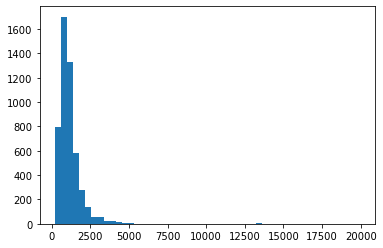

In [36]:
import numpy as np
import matplotlib.pyplot as plt
ward_range = pd.concat(crime_ward.loc[:,i] for i in year_column)
plt.hist(ward_range,bins=50)
print(np.min(crime_ward[year_column]).min())
print(np.max(crime_ward[year_column]).max())

(array([ 6., 10., 17., 10.,  4.,  4.,  5.,  6.,  8., 15., 15., 20., 15.,
        17., 15.,  9., 20.,  8., 11.,  8.,  9.,  3.,  7.,  4.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([9465.0, 10602.7, 11740.4, 12878.1, 14015.8, 15153.5, 16291.2,
        17428.9, 18566.6, 19704.300000000003, 20842.0, 21979.7, 23117.4,
        24255.1, 25392.800000000003, 26530.5, 27668.2, 28805.9,
        29943.600000000002, 31081.3, 32219.0, 33356.7, 34494.4,
        35632.100000000006, 36769.8, 37907.5, 39045.2, 40182.9,
        41320.600000000006, 42458.3, 43596.0, 44733.700000000004, 45871.4,
        47009.1, 48146.8, 49284.5, 50422.200000000004, 51559.9, 52697.6,
        53835.3, 54973.0, 56110.700000000004, 57248.4, 58386.1, 59523.8,
        60661.5, 61799.200000000004, 62936.9, 64074.600000000006, 65212.3,
        66350.0], dtype=object),
 <BarContainer object of 50 artists>)

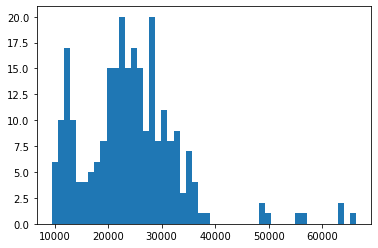

In [39]:
borough_range = pd.concat(crime_bourgh.loc[:,i] for i in year_column)
plt.hist(borough_range,bins=50)

In [40]:
print(np.min(crime_bourgh[year_column]).min())
print(np.max(crime_bourgh[year_column]).max())

9465
66350


In [118]:
featureId = "sdf"
a = {
  "id": featureId,
  "type": "Feature",
  "properties": {
    "prop0": "value1"
  },
  "geometry": {
    "coordinates": [100, 0.7],
    "type": "Point"
  }
}

headers = {
    "Content-Type": "application/json"
}
data = json.dumps(feature)
response = requests.put("https://api.mapbox.com/datasets/v1/dora-fxh/ckm4riow205du28nzutklhyij/features/{}?access_token=sk.eyJ1IjoiZG9yYS1meGgiLCJhIjoiY2ttNG8zaGpsMDZpcDJ3cThnOTlwMWR4MSJ9.3AF8DB7UUb8LzmTvl0rvdA".format(featureId), headers=headers, data=data)

In [119]:
response.text

'{"type":"Feature","properties":{"prop0":"value1"},"geometry":{"coordinates":[100,0.7],"type":"Point"},"id":"sdf"}'